# Example: Generating 2D Input Data for PyRayHF

This example demonstrates how to construct two-dimensional electron-density and magnetic-field inputs for use with the 2D PyRayHF ray-tracing solvers.

The 2D domain is a vertical slice defined as follows:

- The transmitter location serves as the origin of the 2D plane (x = 0, z = 0).  
- The x-axis is oriented according to a user-specified azimuth measured clockwise from geographic north.  
- The horizontal extent (x) is set by a user-defined great-circle distance, and the vertical extent (z) is set by a user-defined maximum altitude.

PyIRI is then used to compute the IRI electron density and IGRF magnetic-field parameters at every point in this 2D domain.

The function `generate_input_2D()` returns a dictionary with the following structure:

**out_data : dict**

- `xgrid` — horizontal grid (km)  
- `zgrid` — vertical grid (km)  

- `xlat` — latitude (degrees) at each horizontal grid point  
- `xlon` — longitude (degrees) at each horizontal grid point  

- `den` — 2D electron density array (m⁻³)  
- `bmag` — 2D magnetic-field strength array (T)  
- `bpsi` — 2D magnetic-field angle relative to vertical (degrees)

- `F2` — PyIRI output dictionary for the F2 region at all (xlon, xlat) grid points  
- `F1` — PyIRI output dictionary for the F1 region at all (xlon, xlat) grid points  
- `E` — PyIRI output dictionary for the E region at all (xlon, xlat) grid points  
- `Es` — PyIRI output dictionary for the Es region at all (xlon, xlat) grid points  

- `year` — year used in the PyIRI run  
- `month` — month used in the PyIRI run  
- `day` — day used in the PyIRI run  
- `UT` — universal time (hours)  
- `F107` — F10.7 index (SFU)

- `tlat` — transmitter latitude (degrees)  
- `tlon` — transmitter longitude (degrees)  
- `az` — azimuth (degrees, clockwise from geographic north) defining the orientation of the 2D output domain

In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import PyIRI
import PyIRI.main_library as pyiri
import PyRayHF
import PyRayHF.library as ml
import cartopy.feature as cfeature
import cartopy.crs as ccrs

# Time and solar conditions for PyIRI
year  = 2025
month = 9
day   = 1
UT    = 0   # UT Time in Hours
F107  = 204 # F10.7 in SFU

# Transmitter location
tlat = 0      # Latitude in degrees
tlon = 0   # Longitude in degrees

# Length and orientation of 2D plane
azimuth      = 0     # Azimuth in degrees 
gcd          = 1000  # Great circle distance in km

# Horizontal Grid Resolution
dx = 1 # Horizontal grid resolution in km

# Vertical Grid Definition
min_alt = 60
max_alt = 700
n_z = 500
aalt = np.linspace(min_alt, max_alt, n_z)
aalt = np.insert(aalt, 0, 0) # Include 0 km

# Location to save output 
save_path = './Example_input_2D_Night.p'

# Generate 2D Data
domain_data = ml.generate_input_2D(year, month, day, UT, tlat, tlon, dx, aalt, gcd, azimuth, F107, save_path=save_path)

Plot the 2-D Domain Density and Magnetic Field Data

<>:15: SyntaxWarning: invalid escape sequence '\m'
<>:15: SyntaxWarning: invalid escape sequence '\m'
/var/folders/hx/vfmrc7fn3cb_5y7fpsjwylcw0000gq/T/ipykernel_48841/158189236.py:15: SyntaxWarning: invalid escape sequence '\m'
  fig.colorbar(pcm1, ax=ax[1], label='$|\mathbf{B}|$ ($\mu$T)')


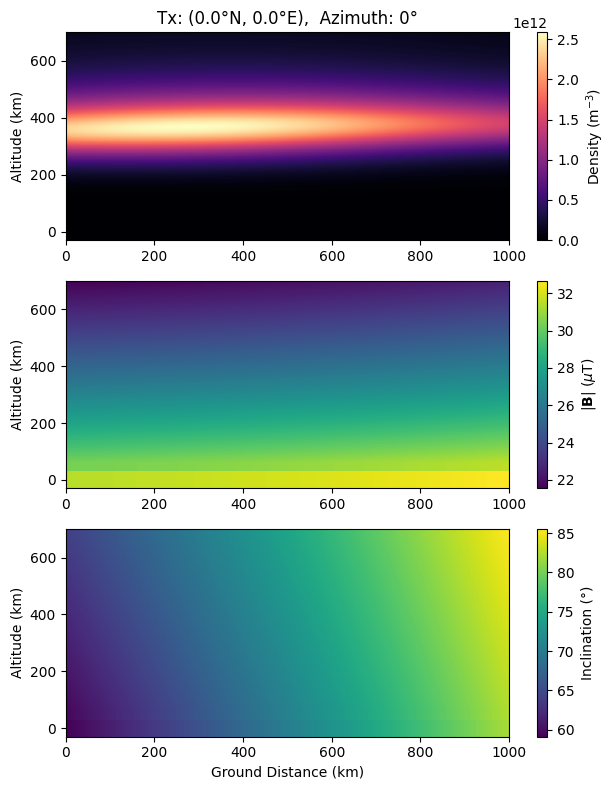

In [2]:
# Initialize Figure
fig, ax = plt.subplots(3, 1, figsize=(6.4,8))

# Grid for Plotting
X, Z = np.meshgrid(domain_data["xgrid"], domain_data["zgrid"])

# Plot Density
pcm0 = ax[0].pcolormesh(X, Z, domain_data["den"], cmap='magma', shading='auto')
fig.colorbar(pcm0, ax=ax[0], label='Density (m$^{-3}$)')
ax[0].set_title(f"Tx: ({tlat:.1f}°N, {tlon:.1f}°E),  Azimuth: {azimuth}°", fontsize=12)
ax[0].set_ylabel("Altitude (km)")

# Magnetic Field Magnitude
pcm1 = ax[1].pcolormesh(X, Z, domain_data["bmag"] * 1e6, cmap='viridis', shading='auto')
fig.colorbar(pcm1, ax=ax[1], label='$|\mathbf{B}|$ ($\mu$T)')
ax[1].set_ylabel("Altitude (km)")

# Inclination
pcm2 = ax[2].pcolormesh(X, Z, domain_data["bpsi"], cmap='viridis', shading='auto')
fig.colorbar(pcm2, ax=ax[2], label='Inclination (°)')
ax[2].set_xlabel("Ground Distance (km)")
ax[2].set_ylabel("Altitude (km)")

plt.tight_layout()

# Save to file
plt.savefig('../figures/Input_Data_2D_Night.png') 

Day-Time Condition

<>:39: SyntaxWarning: invalid escape sequence '\m'
<>:39: SyntaxWarning: invalid escape sequence '\m'
/var/folders/hx/vfmrc7fn3cb_5y7fpsjwylcw0000gq/T/ipykernel_48841/2764095204.py:39: SyntaxWarning: invalid escape sequence '\m'
  fig.colorbar(pcm1, ax=ax[1], label='$|\mathbf{B}|$ ($\mu$T)')


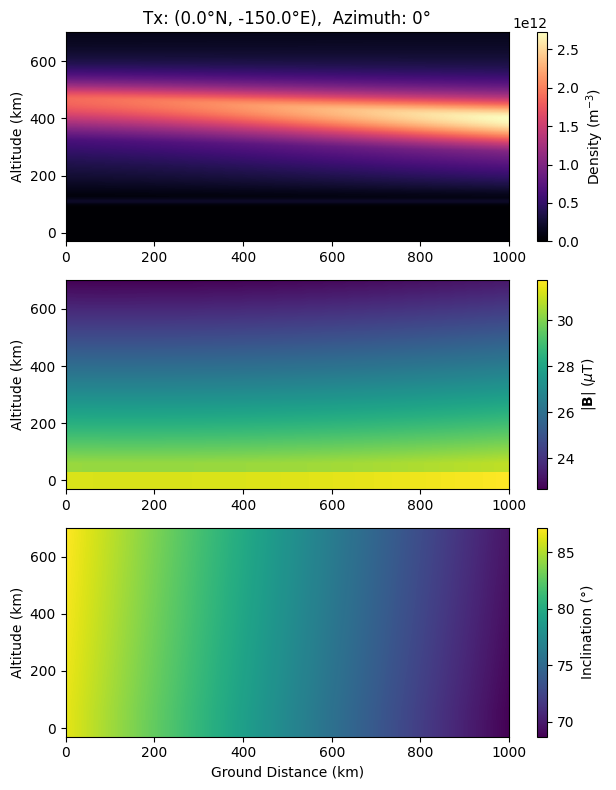

In [5]:
# Transmitter location
tlat = 0      # Latitude in degrees
tlon = -150   # Longitude in degrees

# Length and orientation of 2D plane
azimuth      = 0     # Azimuth in degrees 
gcd          = 1000  # Great circle distance in km

# Horizontal Grid Resolution
dx = 1 # Horizontal grid resolution in km

# Vertical Grid Definition
min_alt = 60
max_alt = 700
n_z = 500
aalt = np.linspace(min_alt, max_alt, n_z)
aalt = np.insert(aalt, 0, 0) # Include 0 km

# Location to save output 
save_path = './Example_input_2D_Day.p'

# Generate 2D Data
domain_data = ml.generate_input_2D(year, month, day, UT, tlat, tlon, dx, aalt, gcd, azimuth, F107, save_path=save_path)

# Initialize Figure
fig, ax = plt.subplots(3, 1, figsize=(6.4,8))

# Grid for Plotting
X, Z = np.meshgrid(domain_data["xgrid"], domain_data["zgrid"])

# Plot Density
pcm0 = ax[0].pcolormesh(X, Z, domain_data["den"], cmap='magma', shading='auto')
fig.colorbar(pcm0, ax=ax[0], label='Density (m$^{-3}$)')
ax[0].set_title(f"Tx: ({tlat:.1f}°N, {tlon:.1f}°E),  Azimuth: {azimuth}°", fontsize=12)
ax[0].set_ylabel("Altitude (km)")

# Magnetic Field Magnitude
pcm1 = ax[1].pcolormesh(X, Z, domain_data["bmag"] * 1e6, cmap='viridis', shading='auto')
fig.colorbar(pcm1, ax=ax[1], label='$|\mathbf{B}|$ ($\mu$T)')
ax[1].set_ylabel("Altitude (km)")

# Inclination
pcm2 = ax[2].pcolormesh(X, Z, domain_data["bpsi"], cmap='viridis', shading='auto')
fig.colorbar(pcm2, ax=ax[2], label='Inclination (°)')
ax[2].set_xlabel("Ground Distance (km)")
ax[2].set_ylabel("Altitude (km)")

plt.tight_layout()

# Save to file
plt.savefig('../figures/Input_Data_2D_Day.png') 